In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [17]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Data Preprocessing**

In [18]:
df.shape

(4269, 13)

In [20]:
df.drop('loan_id', axis=1, inplace=True)

In [22]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [23]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [24]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']


In [25]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)


In [26]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [27]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


**Exploratory Data Analysis(EDA)**

Text(0.5, 1.0, 'Number of Dependents')

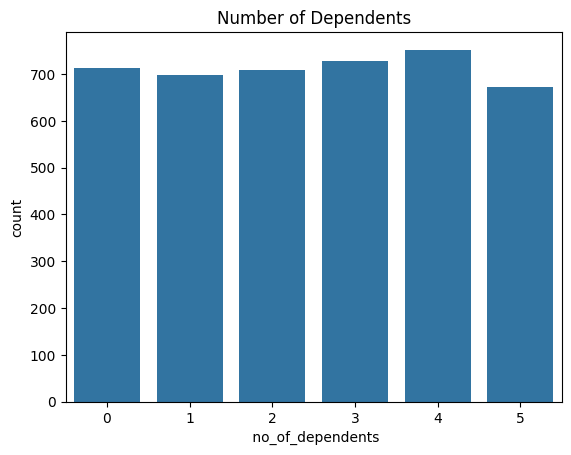

In [28]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

<Axes: xlabel=' education', ylabel=' income_annum'>

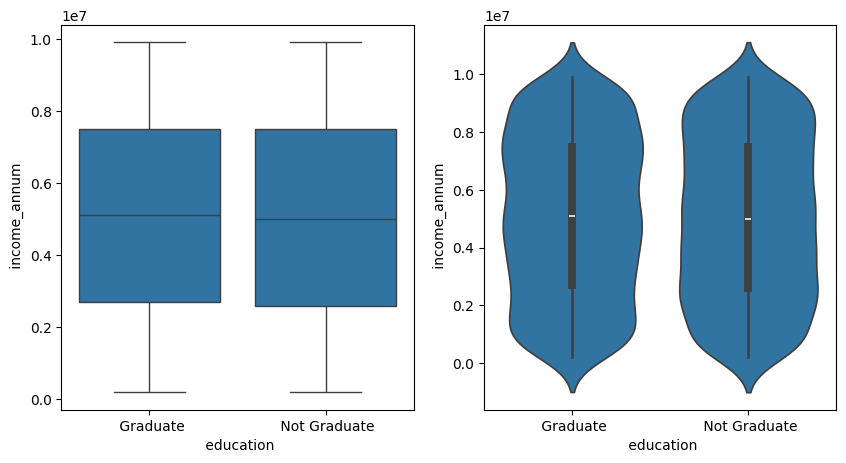

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

Text(0.5, 1.0, 'Self Employed')

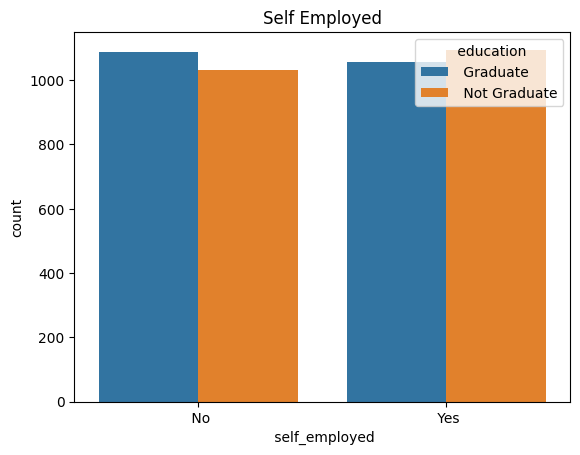

In [30]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

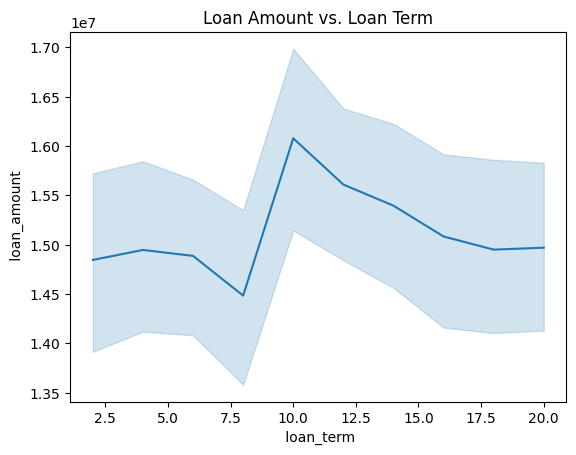

In [31]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

<Axes: xlabel=' cibil_score', ylabel='Count'>

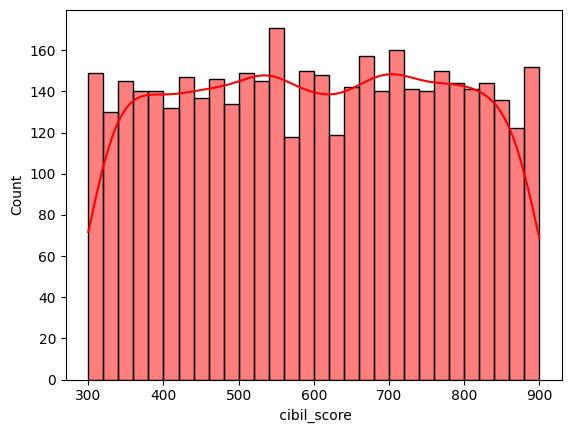

In [32]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

<Axes: xlabel='Immovable_assets', ylabel='Count'>

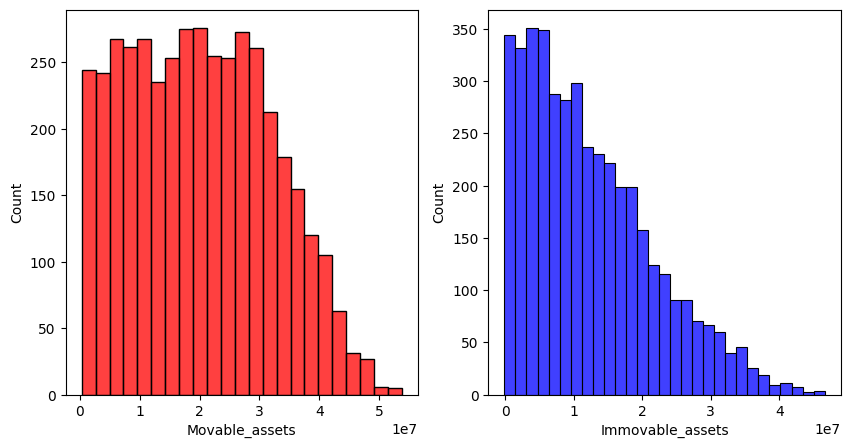

In [33]:
#asset distribution
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

<Axes: xlabel=' no_of_dependents', ylabel='count'>

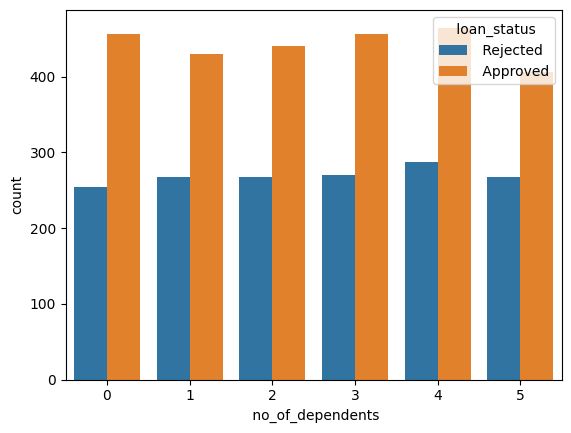

In [34]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

Text(0.5, 1.0, 'Loan Status by Education')

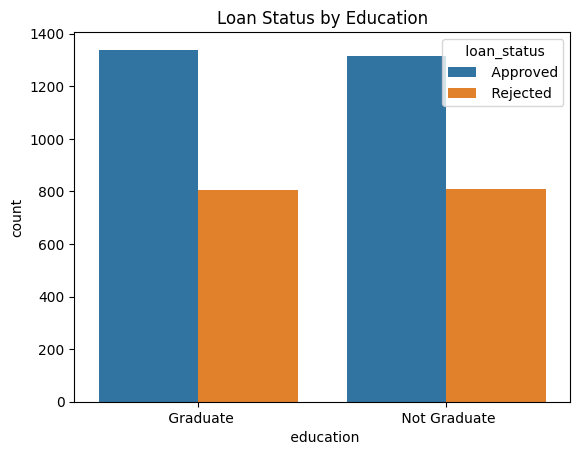

In [35]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

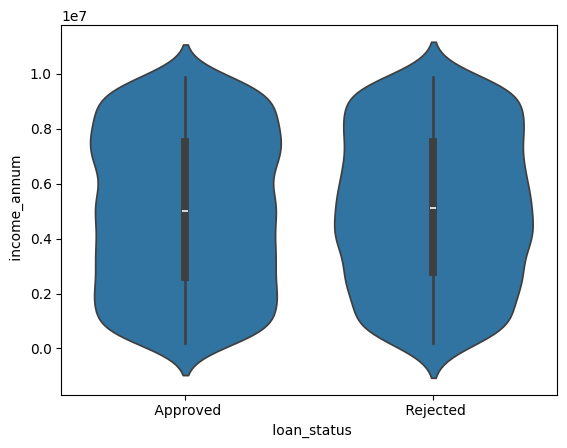

In [36]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

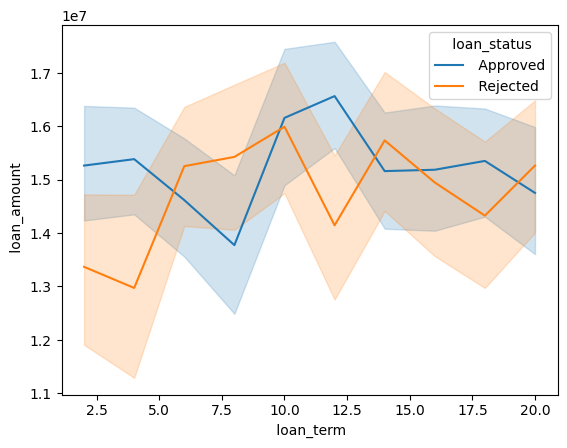

In [37]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

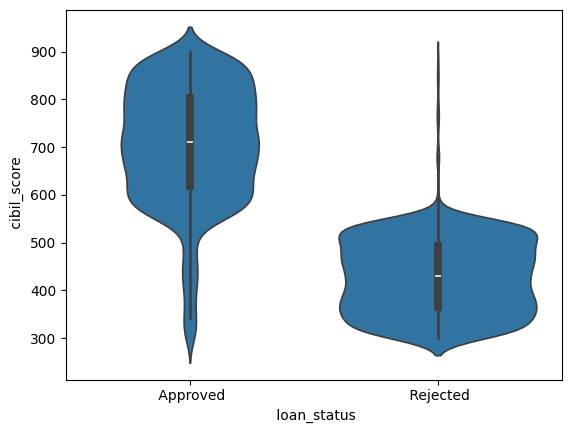

In [38]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

<Axes: xlabel='Immovable_assets', ylabel='Count'>

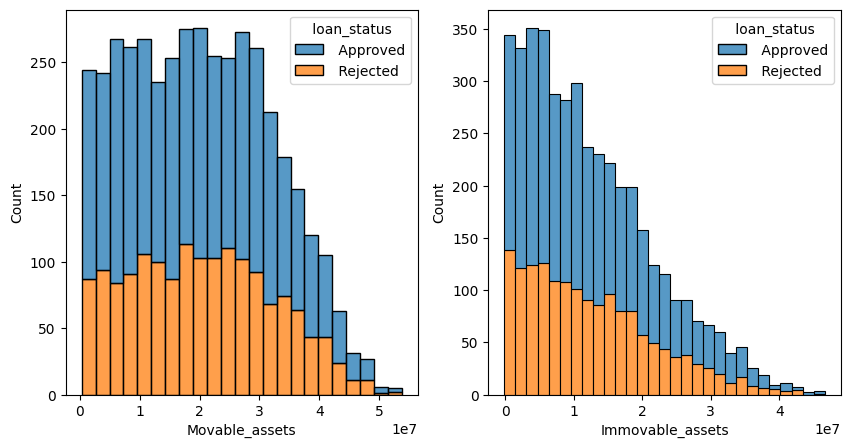

In [39]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

**Data Preprocessing**

Label Encoding the categorical variables

In [40]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [41]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


Coorelation Matrix using Heatmap

<Axes: >

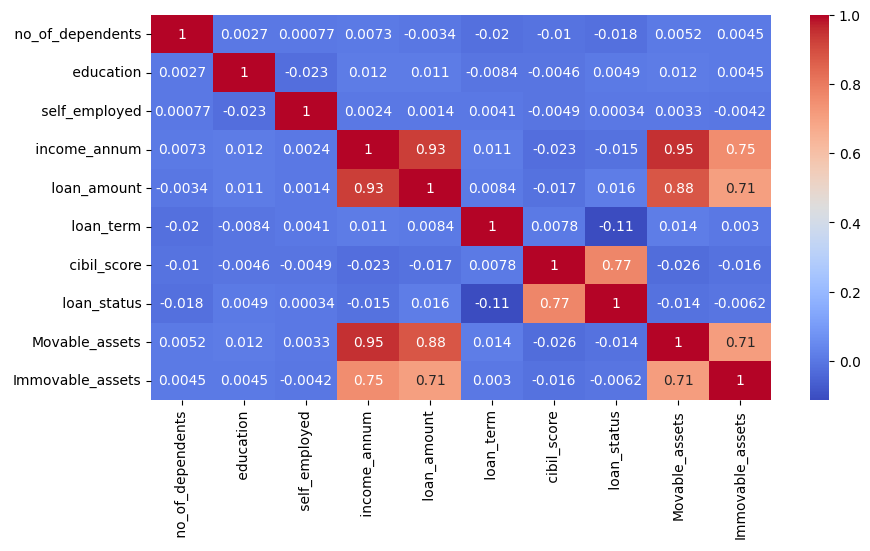

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

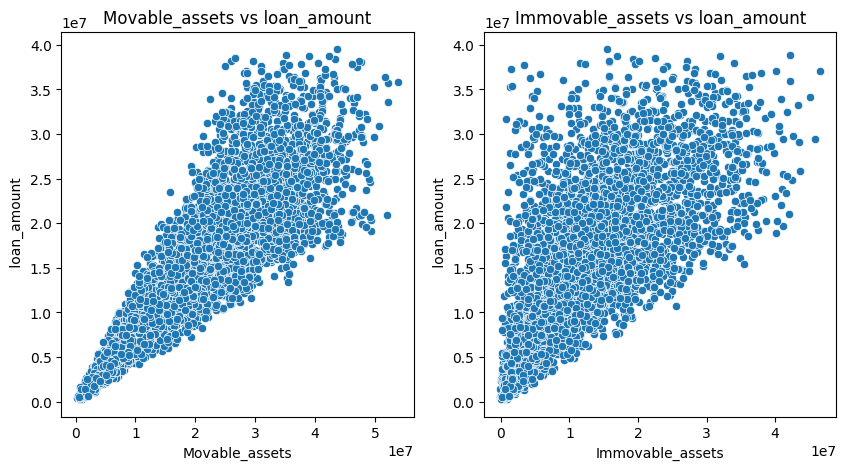

In [43]:
#assets vs loan amount
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

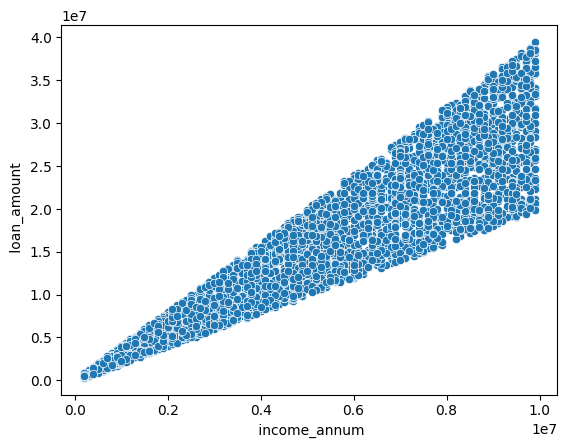

In [44]:
#loan amount vs income
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

**spliting the data**

In [45]:
X = df.drop(' loan_status', axis=1)
y =  df[' loan_status']

In [46]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

**Model Building**

In [47]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [48]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Training Accuracy
#dtree.score(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dtree.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.98
Test set f1-score: 0.99


In [50]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [51]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50]:
  dtree = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dtree.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dtree.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9528550512445095  Cross val score :  0.9528596662722301
Depth  :  2  Training Accuracy :  0.9572474377745241  Cross val score :  0.9572473461268028
Depth  :  3  Training Accuracy :  0.9645680819912152  Cross val score :  0.9634022740134796
Depth  :  4  Training Accuracy :  0.9698389458272328  Cross val score :  0.966617790811339
Depth  :  5  Training Accuracy :  0.9756954612005857  Cross val score :  0.9683798940165664
Depth  :  6  Training Accuracy :  0.9838945827232797  Cross val score :  0.9736516266227643
Depth  :  7  Training Accuracy :  0.9871156661786237  Cross val score :  0.9698435972629522
Depth  :  8  Training Accuracy :  0.9915080527086384  Cross val score :  0.9771672583217577
Depth  :  9  Training Accuracy :  0.9932650073206443  Cross val score :  0.976579890586682
Depth  :  10  Training Accuracy :  0.9935578330893119  Cross val score :  0.9800912349299444
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.981553223234038
Dept

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
dtree = DecisionTreeClassifier(max_depth = 5)
# Fit dt to the training set
dtree.fit(X_train, y_train)
importance = dtree.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, ' no_of_dependents'),
 (0.0, ' education'),
 (0.0, ' self_employed'),
 (0.00973228654256044, ' income_annum'),
 (0.022842432849383112, ' loan_amount'),
 (0.08362710321432672, ' loan_term'),
 (0.880706280374606, ' cibil_score'),
 (0.0009112063520710001, 'Movable_assets'),
 (0.0021806906670526795, 'Immovable_assets')]

[Text(0.5340909090909091, 0.9166666666666666, 'x[6] <= 549.5\ngini = 0.469\nsamples = 3415\nvalue = [1280, 2135]'),
 Text(0.3409090909090909, 0.75, 'x[5] <= 5.0\ngini = 0.186\nsamples = 1415\nvalue = [1268, 147]'),
 Text(0.29545454545454547, 0.5833333333333334, 'x[4] <= 26250000.0\ngini = 0.498\nsamples = 278\nvalue = [131, 147]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[3] <= 7050000.0\ngini = 0.498\nsamples = 241\nvalue = [128, 113]'),
 Text(0.09090909090909091, 0.25, 'x[4] <= 18400000.0\ngini = 0.495\nsamples = 195\nvalue = [88, 107]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.5\nsamples = 169\nvalue = [87, 82]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.2727272727272727, 0.25, 'x[4] <= 21850000.0\ngini = 0.227\nsamples = 46\nvalue = [40, 6]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.3181818181818182, 0.08333333333333333, 'gini = 0.

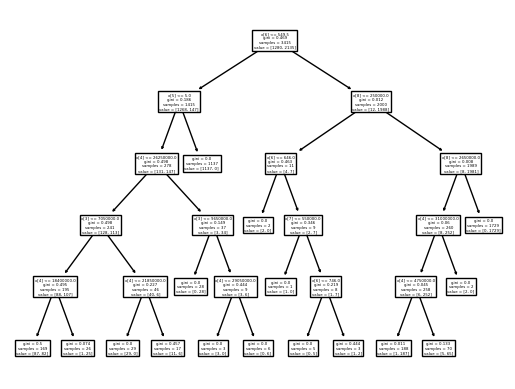

In [53]:
from sklearn import tree
tree.plot_tree(dtree) # dt is the decison tree that I have learnt

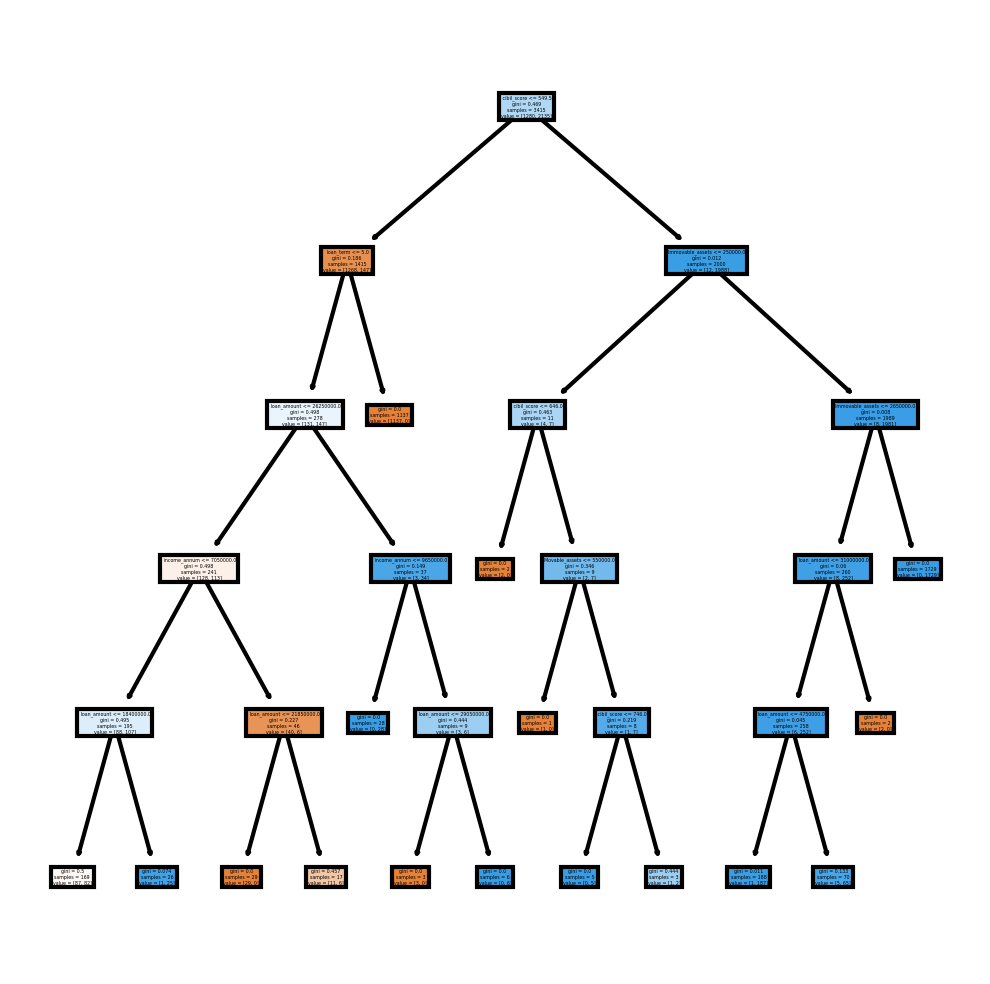

In [54]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()


In [56]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Training Accuracy
rfc.score(X_train, y_train)


1.0

In [58]:
# Training Accuracy
#dtree.score(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = rfc.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.99
Test set f1-score: 0.99


In [59]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

**Model Evalution**

Text(518.4494949494949, 0.5, 'Actual')

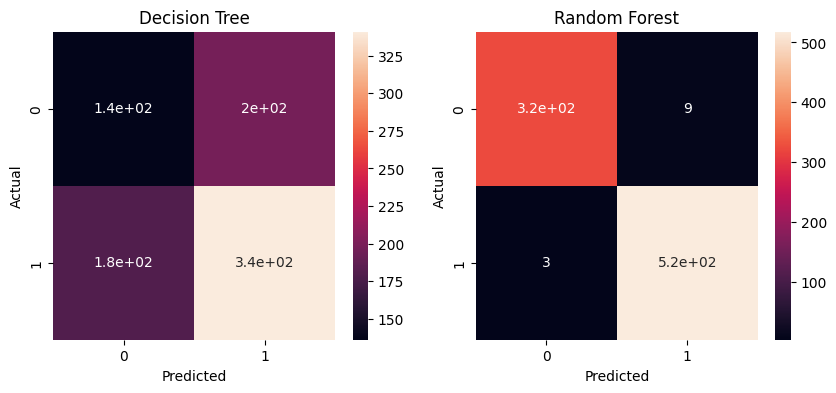

In [60]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

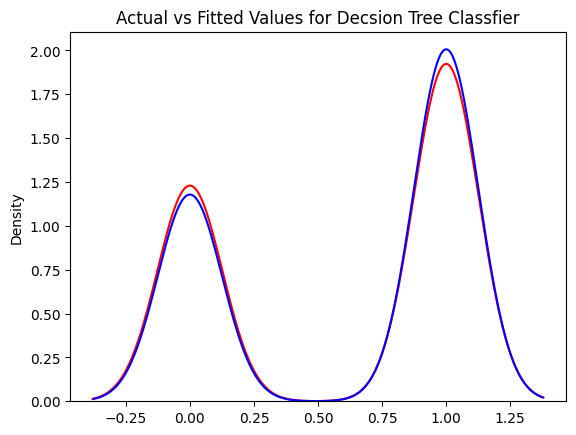

In [61]:
#distribution plot

ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')


Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

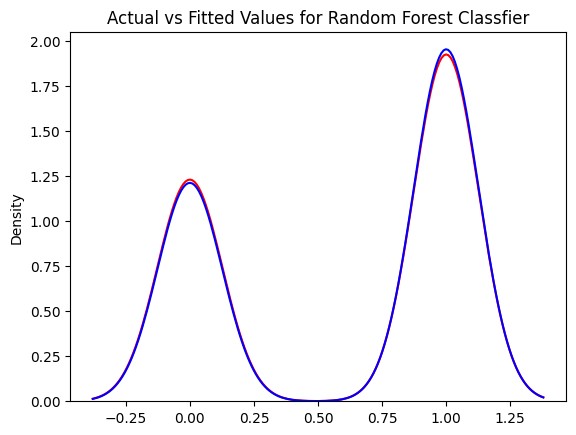

In [62]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42       333
           1       0.63      0.65      0.64       521

    accuracy                           0.56       854
   macro avg       0.53      0.53      0.53       854
weighted avg       0.55      0.56      0.56       854

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       333
           1       0.98      0.99      0.99       521

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test, dtree_pred, and rfc_pred are your true labels and predicted labels for the classification task

# Decision Tree Classifier
print('Accuracy Score (Decision Tree): ', accuracy_score(y_test, dtree_pred))
print('Precision Score (Decision Tree): ', precision_score(y_test, dtree_pred))
print('Recall Score (Decision Tree): ', recall_score(y_test, dtree_pred))
print('F1 Score (Decision Tree): ', f1_score(y_test, dtree_pred))
print('ROC AUC Score (Decision Tree): ', roc_auc_score(y_test, dtree_pred))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, dtree_pred))
print('\n')

# Random Forest Classifier
print('Accuracy Score (Random Forest): ', accuracy_score(y_test, rfc_pred))
print('Precision Score (Random Forest): ', precision_score(y_test, rfc_pred))
print('Recall Score (Random Forest): ', recall_score(y_test, rfc_pred))
print('F1 Score (Random Forest): ', f1_score(y_test, rfc_pred))
print('ROC AUC Score (Random Forest): ', roc_auc_score(y_test, rfc_pred))
print('Confusion Matrix (Random Forest):\n', confusion_matrix(y_test, rfc_pred))

Accuracy Score (Decision Tree):  0.5585480093676815
Precision Score (Decision Tree):  0.6338289962825279
Recall Score (Decision Tree):  0.654510556621881
F1 Score (Decision Tree):  0.644003777148253
ROC AUC Score (Decision Tree):  0.5314594825151447
Confusion Matrix (Decision Tree):
 [[136 197]
 [180 341]]


Accuracy Score (Random Forest):  0.9859484777517564
Precision Score (Random Forest):  0.9829222011385199
Recall Score (Random Forest):  0.9942418426103646
F1 Score (Random Forest):  0.9885496183206106
ROC AUC Score (Random Forest):  0.983607407791669
Confusion Matrix (Random Forest):
 [[324   9]
 [  3 518]]


**Feature Importance**

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
dtree = DecisionTreeClassifier(max_depth = 5)
# Fit dt to the training set
dtree.fit(X_train, y_train)
importance = dtree.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, ' no_of_dependents'),
 (0.0, ' education'),
 (0.0, ' self_employed'),
 (0.00973228654256044, ' income_annum'),
 (0.022842432849383112, ' loan_amount'),
 (0.08362710321432672, ' loan_term'),
 (0.880706280374606, ' cibil_score'),
 (0.0009112063520710001, 'Movable_assets'),
 (0.0021806906670526795, 'Immovable_assets')]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
rfc = RandomForestClassifier(max_depth = 5)
# Fit dt to the training set
rfc.fit(X_train, y_train)
importance = rfc.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0024490648285550465, ' no_of_dependents'),
 (0.0005791322728718517, ' education'),
 (0.0004784855248715166, ' self_employed'),
 (0.008411540945089642, ' income_annum'),
 (0.01760445300824515, ' loan_amount'),
 (0.07365666663046301, ' loan_term'),
 (0.8731069421192512, ' cibil_score'),
 (0.01178579762026612, 'Movable_assets'),
 (0.011927917050386504, 'Immovable_assets')]

**conclusion**

From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:

                    CIBIL Score: People with higher CIBIL score have higher chances of loan approval
                    Number of Dependents: People with more number of dependents have less chances of loan approval
                    Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
                    Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval
Coming to the machine learning models, I have used Decision Tree Classifier and Random Forest Classifier. Both the models have given results having ROC AUC Score - 53.3 % and 98.3 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.